In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [130]:
df = pd.read_csv("Sales.csv")

In [131]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [132]:
df.Country.unique()

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

In [133]:
df = df[df.Country == "United Kingdom"]

In [134]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
58,2013-09-17,17,September,2013,29,Young Adults (25-34),F,United Kingdom,England,Accessories,Bike Racks,Hitch Rack - 4-Bike,15,45,120,1053,675,1728
59,2015-09-17,17,September,2015,29,Young Adults (25-34),F,United Kingdom,England,Accessories,Bike Racks,Hitch Rack - 4-Bike,15,45,120,1053,675,1728
116,2013-09-13,13,September,2013,53,Adults (35-64),M,United Kingdom,England,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,281,180,461
117,2015-09-13,13,September,2015,53,Adults (35-64),M,United Kingdom,England,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,140,90,230
204,2014-05-11,11,May,2014,17,Youth (<25),M,United Kingdom,England,Accessories,Bike Racks,Hitch Rack - 4-Bike,6,45,120,421,270,691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113005,2016-05-03,3,May,2016,21,Youth (<25),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113028,2013-12-28,28,December,2013,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",2,24,64,75,48,123
113029,2015-12-28,28,December,2015,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",2,24,64,75,48,123
113030,2014-04-12,12,April,2014,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",6,24,64,225,144,369


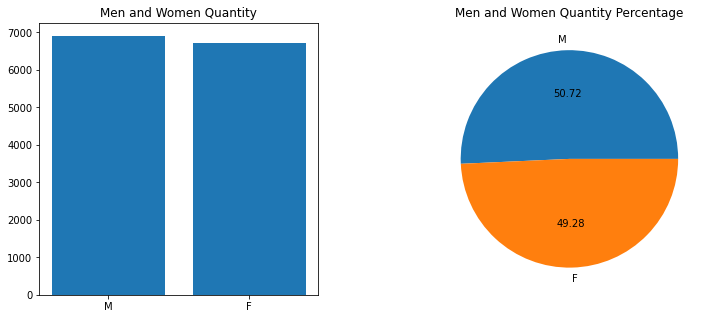

In [135]:
table = df.Customer_Gender.value_counts().reset_index()

plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1)
# sns.barplot(data = table, x = "index", y = "Customer_Gender")
ax1.bar(x = table["index"], height = table.Customer_Gender)
plt.title("Men and Women Quantity")
# plt.show()

values = table.Customer_Gender
labels = table["index"]

ax2 = plt.subplot(1, 2, 2)
ax2.pie(x = values, labels = labels,autopct="%.2f")
plt.title("Men and Women Quantity Percentage")

plt.subplots_adjust(wspace= 0.4)
plt.show()


Qunatile:  0.25   27.0
Qunatile:  0.5   34.0
Qunatile:  0.75   43.0


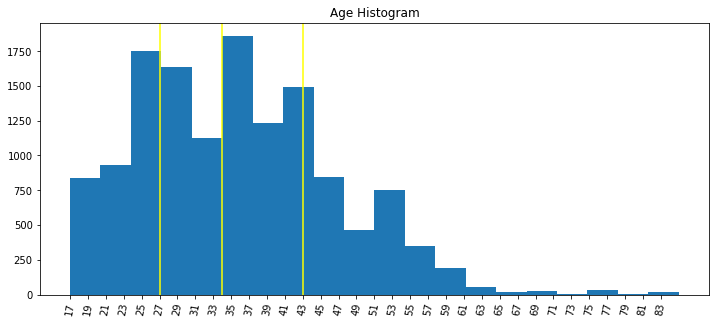

In [136]:
# Histograma grupos de edad
min_val = np.amin(df.Customer_Age)
max_val = np.amax(df.Customer_Age)

x_values = range(min_val, max_val, 2)
plt.figure(figsize = (12, 5))
ax = plt.subplot()
plt.hist(df.Customer_Age, bins = 20)
for i in range(25,100,25):
    plt.axvline(np.quantile(df.Customer_Age, i/100), c = "yellow")
    print("Qunatile: ", i/100, " ", np.quantile(df.Customer_Age, i/100))
ax.set_xticks(x_values)
plt.xticks(rotation = 80)
plt.title("Age Histogram")
plt.show()

# De 24 a 44 anos es mi mercado mas frecuente

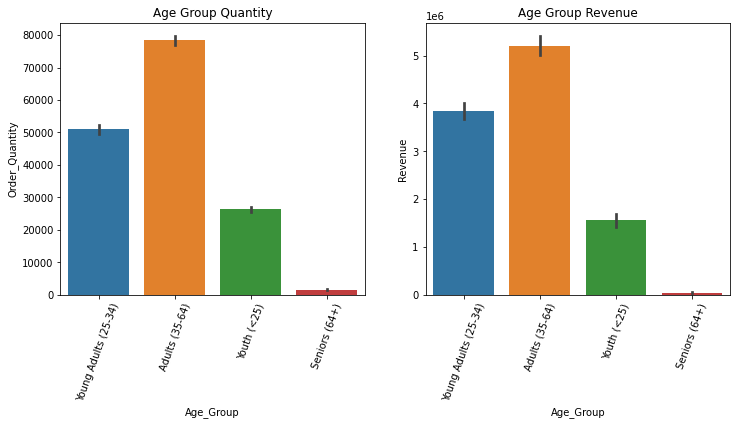

In [137]:
# Que group age genera mas ordenes
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.barplot(ax = ax[0], data = df, x = "Age_Group", y = "Order_Quantity", estimator = np.sum)
ax[0].set_title("Age Group Quantity")
ax[0].tick_params(axis = "x", rotation = 70)

# Que grupo genera mas ganancias 
sns.barplot(ax = ax[1], data = df, x ="Age_Group", y = "Revenue", estimator = np.sum)
ax[1].set_title("Age Group Revenue")
ax[1].tick_params(axis = "x", rotation = 70)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 864x360 with 0 Axes>

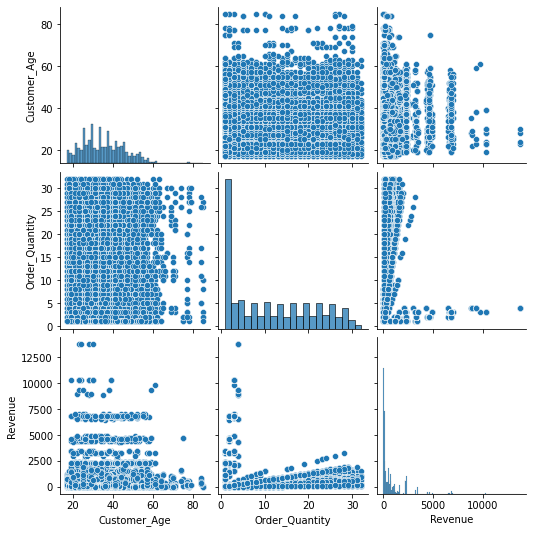

In [138]:
df_values = df[["Customer_Age", "Order_Quantity", "Revenue"]]
plt.clf()
plt.figure(figsize = (12, 5))
sns.pairplot(data = df_values)
plt.show()

<Figure size 432x288 with 0 Axes>

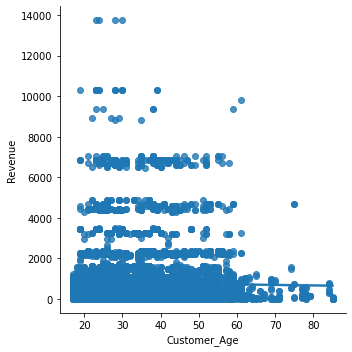

-0.021630021365059107


In [144]:
# Relacion entre edad e ingresos
plt.clf()
sns.lmplot(data = df, x = "Customer_Age", y = "Revenue")
plt.show()

corr,_ = pearsonr(df.Customer_Age, df.Revenue)
print(corr)